In [79]:
path = "garments_worker_productivity.csv"
df=pd.read_csv(path, header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [80]:
df['wip'].isnull().sum()

506

In [81]:
df['wip'].fillna(0,inplace=True)
df['wip'].isnull().sum()

0

In [82]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )

In [83]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,"quarter")
df = create_dummies(df,"department")
df = create_dummies(df,"day")
df = create_dummies(df,"team")

df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12'],
      dtype='object')

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["no_of_style_change_enc"] = le.fit_transform(df["no_of_style_change"])
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,0,0,1,0,0
2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,0,0,0,1,0
2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,...,0,0,1,0,0,0,0,0,0,0


In [85]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_enc'],
      dtype='object')

In [86]:
df['diff']=df.actual_productivity-df.targeted_productivity
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change_enc', 'diff'],
      dtype='object')

In [87]:
df['Target_label']=np.nan
df.head()
df.loc[df['diff']<0,'Target_label'] = -1
df.loc[(df['diff']==0), 'Target_label'] = 0
df.loc[df['diff']>0, 'Target_label'] = 1
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc,diff,Target_label
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,...,0,0,1,0,0,0,0,0,0.140725,1.0
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,...,0,0,0,0,0,0,0,0,0.136500,1.0
2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,1,0,0,0.000570,1.0
2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,0,1,0,0.000570,1.0
2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,...,1,0,0,0,0,0,0,0,0.000382,1.0


In [88]:
df[df['Target_label']==0]

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_enc,diff,Target_label
date,,,,,,,,,,,,,,,,,,,,,
2015-01-10,Quarter2,sewing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,...,0,0,0,0,1,0,0,0,0.0,0.0
2015-01-11,Quarter2,sewing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
2015-01-11,Quarter2,sewing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,...,0,0,0,0,1,0,0,0,0.0,0.0
2015-01-12,Quarter2,sewing,Monday,2,0.8,28.08,737.0,10530,63,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
2015-01-13,Quarter2,sewing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
2015-02-19,Quarter3,sewing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,...,0,0,1,0,0,0,0,2,0.0,0.0


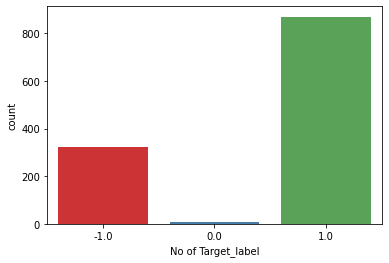

In [89]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

In [90]:
df['Target_label'].value_counts()

 1.0    869
-1.0    322
 0.0      6
Name: Target_label, dtype: int64

In [91]:
df['Target_label'].value_counts()

 1.0    869
-1.0    322
 0.0      6
Name: Target_label, dtype: int64

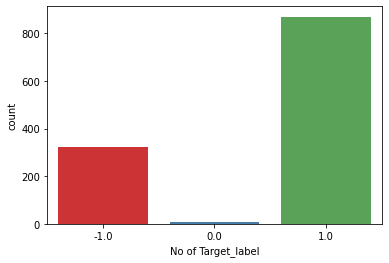

In [92]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

In [93]:
df1=df.drop(['quarter', 'department', 'day', 'team'],axis=1)

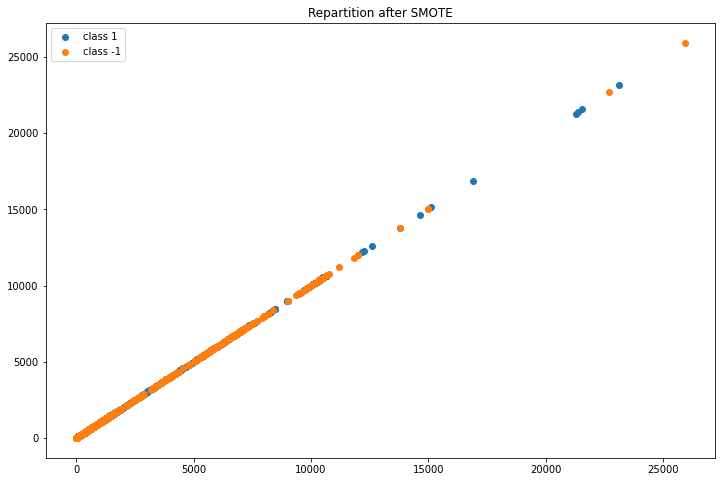

In [94]:
from imblearn.over_sampling import SMOTE
X = df1.loc[:, df1.columns != 'Target_label']
y = df1.Target_label
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)
plt.figure(figsize=(12, 8))
plt.title('Repartition after SMOTE')

#plt.scatter(X_smote[y_smote==1][:, 0], X_smote[y_smote==1][:, 1], label='class 1')
#plt.scatter(X_smote[y_smote==0][:, 0], X_smote[y_smote==0][:, 1], label='class 0')
plt.scatter(X_smote[y_smote==1], X_smote[y_smote==1], label='class 1')
plt.scatter(X_smote[y_smote==-1], X_smote[y_smote==-1], label='class -1')
plt.legend()
plt.grid(False)
plt.show()

In [95]:
X_smote.shape, y_smote.shape

((2607, 37), (2607,))

In [96]:
df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
df.shape

(2607, 38)

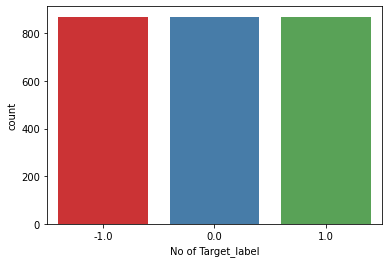

In [97]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()